In [5]:
# from __future__ import print_function
# import keras
# from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

# batch_size = 32
# num_classes = 10
# #epochs = 1600
# data_augmentation = True

# # The data, shuffled and split between train and test sets:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')


from __future__ import print_function
import keras
from keras.datasets import cifar10
#ImageDataGenerator has been moved to  tf.keras.utils.image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

batch_size = 32
num_classes = 10
#epochs = 1600
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**CASE 1 - relu,softmax,rmsprop,50 epochs**

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 22, 22, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 22, 22, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 48)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │          24,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,558 (326.40 KB)

 Trainable params: 83,558 (326.40 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#opt = keras.optimizers.RMSProp(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [10]:
 m1=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.2246 - loss: 2.0645 - val_accuracy: 0.4037 - val_loss: 1.5997
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4216 - loss: 1.5724 - val_accuracy: 0.4764 - val_loss: 1.3955
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4916 - loss: 1.3816 - val_accuracy: 0.4925 - val_loss: 1.3870
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5441 - loss: 1.2730 - val_accuracy: 0.5440 - val_loss: 1.3144
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5744 - loss: 1.1960 - val_accuracy: 0.5237 - val_loss: 1.3278
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5946 - loss: 1.1387 - val_accuracy: 0.5581 - val_loss: 1.2409
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6147 - loss: 1.0869 - val_accuracy: 0.5758 - val_loss: 1.2439
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6293 - loss: 1.0516

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

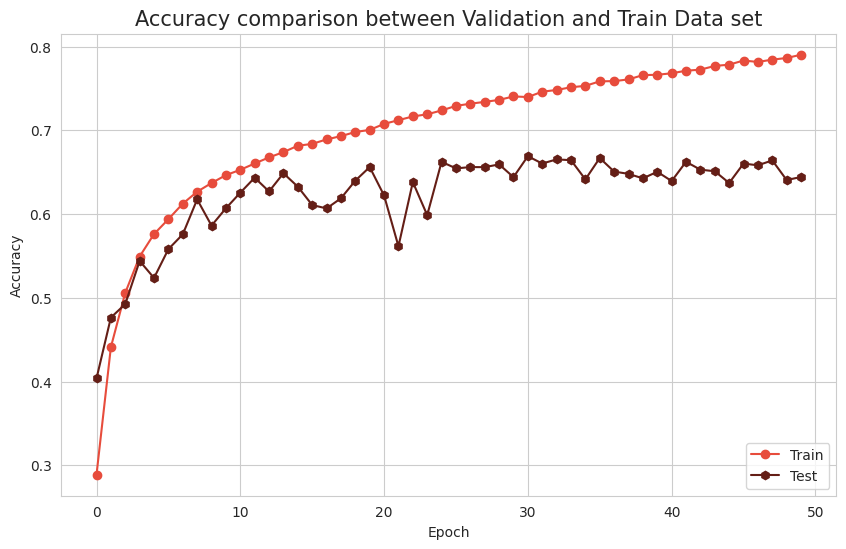

In [12]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m1.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

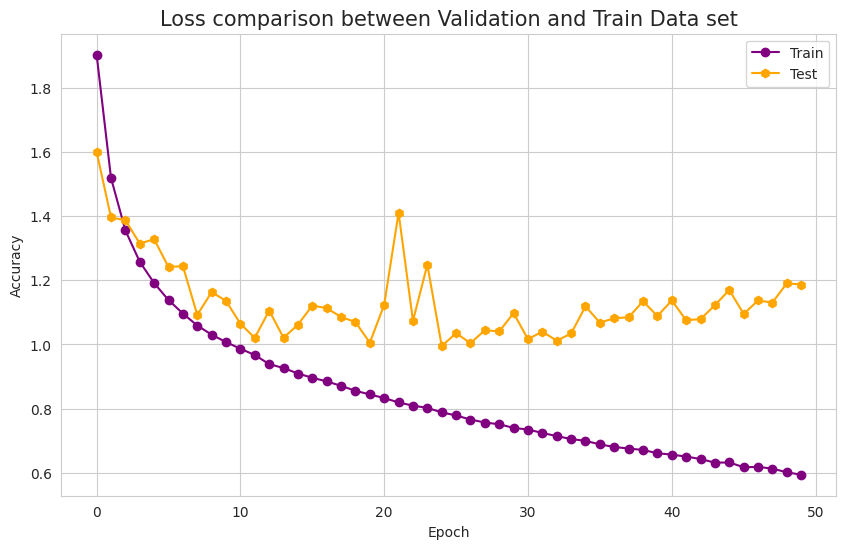

In [13]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

CASE 2 - relu,softmax,adam,epochs-100

In [14]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(GlobalMaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 24, 24, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 22, 22, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 22, 22, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 20, 20, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 20, 20, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 20, 20, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 179,418 (700.85 KB)

 Trainable params: 178,554 (697.48 KB)

 Non-trainable params: 864 (3.38 KB)

In [15]:
opt = keras.optimizers.Adamax(learning_rate=0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
 m2=model2.fit(x_train, y_train,
              batch_size=500,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.2059 - loss: 3.4459 - val_accuracy: 0.1000 - val_loss: 2.4052
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 86ms/step - accuracy: 0.2931 - loss: 2.1047 - val_accuracy: 0.1000 - val_loss: 2.6875
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.3343 - loss: 1.9299 - val_accuracy: 0.1040 - val_loss: 2.9367
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.3717 - loss: 1.8173 - val_accuracy: 0.1125 - val_loss: 3.0075
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.4086 - loss: 1.7003 - val_accuracy: 0.2183 - val_loss: 2.3178
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.4369 - loss: 1.6242 - val_accuracy: 0.3328 - val_loss: 1.8633
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.4577 - loss: 1.5526 - val_accuracy: 0.4627 - val_loss: 1.5026
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.4840 - loss: 1.4

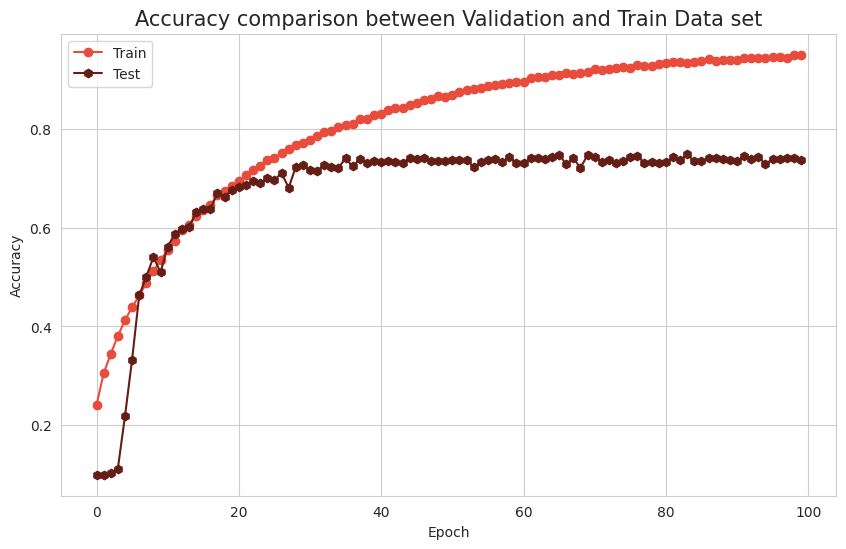

In [17]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

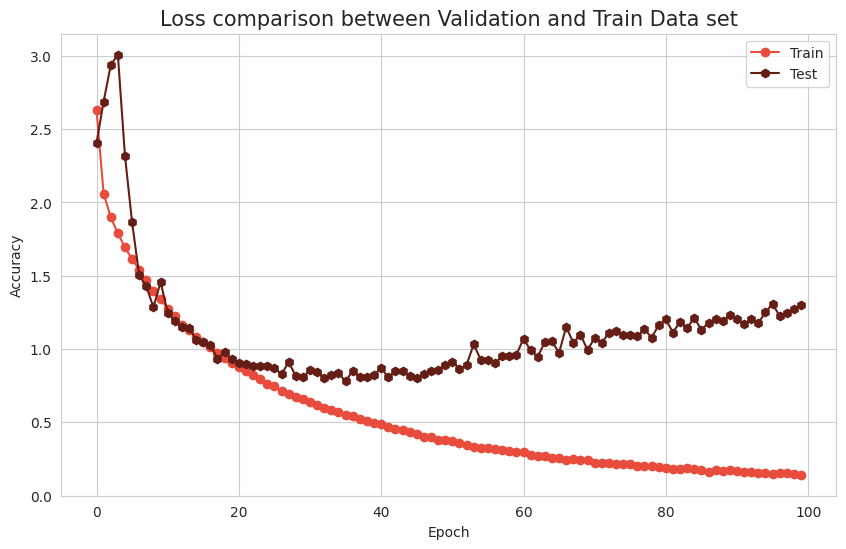

In [18]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

CASE 3-tanh,softmax,epchs-100,adamax



In [19]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(GlobalMaxPooling2D())
model3.add(Dense(500))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 48)          │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 24, 24, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 22, 22, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 22, 22, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 20, 20, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 20, 20, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 18, 18, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 18, 18, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ (None, 48)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │          24,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,126 (488.77 KB)

 Trainable params: 125,126 (488.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#opt = keras.optimizers.Adam(lr=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer="Adamax",
              metrics=['accuracy'])

In [ ]:
 m3=model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
plt.plot(m3.history['acc'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_acc'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

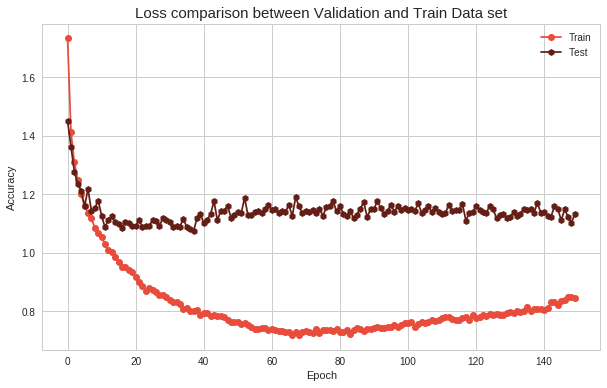

In [ ]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m3.history['loss'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()